In [1]:
import os

os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/michael_dev/RA2_alpine_lads/ra_joint_predictions')

In [2]:
from utils.config import Config

config = Config()

In [3]:
from dream.prediction import predict_dream_test_set

predict_params = {
        'hands_joint_source': './data/predictions/hand_joint_data_test.csv',
        'feet_joint_source': './data/predictions/feet_joint_data_test.csv',
        'hands_narrowing_model': '../trained_models/adam_no_weights/hands_narrowing_adam_no_weights_val.h5',
        'wrists_narrowing_model': '../trained_models/adam_no_weights/wrists_narrowing_adam_no_weights_val.h5',
        'feet_narrowing_model': '../trained_models/adam_no_weights/feet_narrowing_adam_no_weights_val.h5',
        'hands_erosion_model': '../trained_models/adam_no_weights/hands_erosion_adam_no_weights_val.h5',
        'wrists_erosion_model': '../trained_models/adam_no_weights/wrists_erosion_adam_no_weights_val.h5',
        'feet_erosion_model': '../trained_models/adam_no_weights/feet_erosion_adam_no_weights_val.h5',
        'template_path': '../resources/template.csv',
        'output_path': '../trained_models/adam_no_weights_val_output.csv',
    }

predict_dream_test_set(config, predict_params)

In [9]:
import pandas as pd

output = pd.read_csv('../trained_models/output_v1_val.csv')
truth = pd.read_csv(config.train_location + '/training.csv')
new_output = pd.read_csv('../trained_models/adam_no_weights_val_output.csv')

truth = truth.iloc[[patient_id in output['Patient_ID'].to_numpy() for patient_id in truth['Patient_ID'].to_numpy()]]

In [48]:
v1 = output.merge(truth, how = 'inner', on  = 'Patient_ID')
adam_no_weights = new_output.merge(truth, how = 'inner', on  = 'Patient_ID')

In [31]:
o = output['Overall_Tol'].to_numpy()
t = truth['Overall_Tol'].to_numpy()
n_o = new_output['Overall_Tol'].to_numpy()

In [53]:
from sklearn.metrics import r2_score

r2_score(v1['Overall_Tol_y'], v1['Overall_Tol_x'])

0.6204825976590534

In [52]:
r2_score(adam_no_weights['Overall_Tol_y'], adam_no_weights['Overall_Tol_x'])

0.656442432937707

In [49]:
import numpy as np

np.mean(np.absolute(adam_no_weights['Overall_Tol_x'] - adam_no_weights['Overall_Tol_y']))

11.087545346669708

In [50]:
np.mean(np.absolute(v1['Overall_Tol_x'] - v1['Overall_Tol_y']))

11.660043634382404

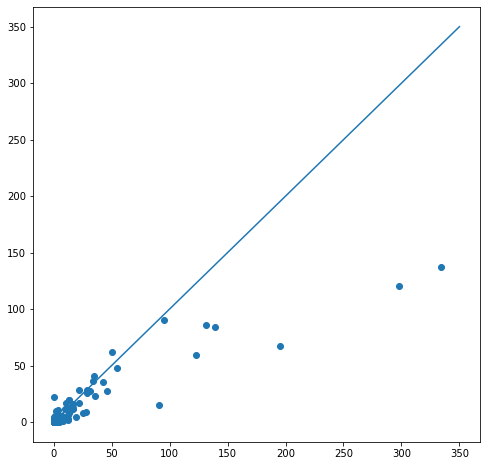

In [54]:
plt.figure(figsize = (8, 8))
plt.scatter(v1['Overall_Tol_y'], v1['Overall_Tol_x'])
plt.plot([0, 350], [0, 350])

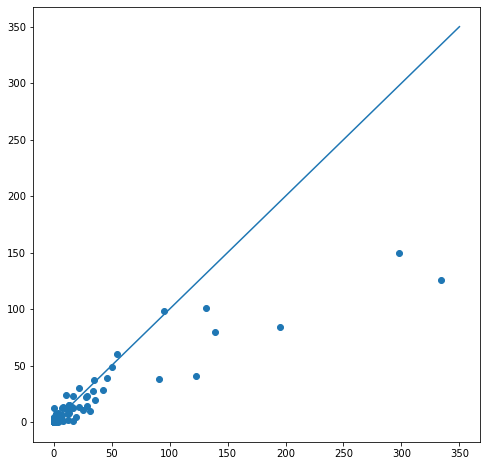

In [55]:
plt.figure(figsize = (8, 8))
plt.scatter(adam_no_weights['Overall_Tol_y'], adam_no_weights['Overall_Tol_x'])
plt.plot([0, 350], [0, 350])